In [1]:
### Import libraries
import pandas as pd # primary data structure library
import numpy as np
#from matplotlib import pyplot
import matplotlib.pyplot as plt

# Downloading Data 

In [2]:
! git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 51712 (delta 4), reused 9 (delta 4), pack-reused 51700
Receiving objects: 100% (51712/51712), 413.44 MiB | 27.37 MiB/s, done.
Resolving deltas: 100% (32424/32424), done.
Checking out files: 100% (620/620), done.


This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [26]:
### Select yesterday date as report provide figures for the day before
#from datetime import date, timedelta
#file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))

### Select data path
fullpath1= '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

df1 = pd.read_csv(fullpath1, error_bad_lines=False)

fullpath2 = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df2 = pd.read_csv(fullpath2, error_bad_lines=False)



# Exploring USA Data cases

In [27]:
df1.shape

(3340, 246)

view the dataframe

In [28]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,...,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1030,1050,1065,1086,1169,1174,1162,1188,1196,1196,1206,1218,1219,1235,1241,1240,1255,1264,1266,1286,1286,1281,1284,1296,1309,1345,1348,1354,1345,1349,1355,1371,1377,1383,1385,1398,1413,1420,1432,1442
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3322,3380,3443,3502,3544,3651,3670,3710,3744,3791,3839,3877,3888,3906,3931,3957,3997,4037,4069,4083,4100,4166,4199,4230,4307,4402,4422,4445,4458,4495,4513,4542,4569,4586,4609,4639,4678,4722,4752,4781
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,564,565,569,573,575,576,579,581,586,590,598,604,605,606,613,619,622,626,629,633,628,616,614,620,624,628,628,629,617,614,616,616,616,617,617,618,618,618,620,622
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,384,413,416,426,438,442,444,453,457,465,469,469,474,476,490,494,501,503,510,510,511,513,515,517,523,533,535,538,541,542,545,550,555,557,562,564,566,574,576,578
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,745,759,774,788,800,812,816,825,835,848,854,860,863,887,901,912,930,931,934,946,967,968,979,983,1004,1025,1034,1045,1036,1037,1049,1062,1065,1070,1071,1082,1099,1109,1114,1121


How to find out the columns?

In [29]:
df1.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20', '9/9/20', '9/10/20',
       '9/11/20', '9/12/20', '9/13/20'],
      dtype='object', length=246)

In [30]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,...,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Teton, Wyoming, US",84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,363,367,371,370,374,370,372,373,375,383,385,389,390,393,394,398,399,401,409,409,412,417,417,424,425,429,430,430,433,435,440,440,447,447,450,451,453,462,465,470
"Uinta, Wyoming, US",84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,268,272,274,274,278,277,279,278,278,277,276,276,277,278,283,283,283,283,283,283,283,289,289,292,292,295,298,301,303,305,308,308,308,308,309,308,310,310,310,311
"Unassigned, Wyoming, US",84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,53,73,73,73,73,0,0,0,0,0,0,0,0,0,0,0,2
"Washakie, Wyoming, US",84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58,59,69,70,77,77,79,82,86,96,97,97,100,102,104,106,106,107,108,108,108,108,108,108,108,108,108,108,109,109,110,110,111,111,111,111,111,111,111,111
"Weston, Wyoming, US",84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,6,5,5,5,5,7,7,8,8,12,0,11,11,11,11,11,11,11,11,11,11,11,11,19,20,20,20,20,20,20,21,21,21,23,23


In [32]:
df1['Admin2'][3330:3335]

Combined_Key
Park, Wyoming, US                Park
Platte, Wyoming, US            Platte
Sheridan, Wyoming, US        Sheridan
Sublette, Wyoming, US        Sublette
Sweetwater, Wyoming, US    Sweetwater
Name: Admin2, dtype: object

In [33]:
df1.iloc[3330:3335, 2:5]

,iso3,code3,FIPS
Combined_Key,,,
"Park, Wyoming, US",USA,840,56029.0
"Platte, Wyoming, US",USA,840,56031.0
"Sheridan, Wyoming, US",USA,840,56033.0
"Sublette, Wyoming, US",USA,840,56035.0
"Sweetwater, Wyoming, US",USA,840,56037.0


## Note. It turns out that there are unassigned cases in some states, such as Wyoming. Thse unassigned cases become zero when they are settled. 

How to find out dataframe dimensions

In [34]:
print ('dataframe dimensions:', df1.shape)

dataframe dimensions: (3340, 246)


How many "province states" are there in this data set?

In [35]:
df1.Province_State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [36]:
len(df1.Province_State.unique())

58

In [37]:
#df1.max #?

Find out the largest value for column '9/8/20'

In [38]:
df1["9/8/20"].max()

249241

## Find out which row has the largest value on '9/8/20'

1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         1
1/27/20         1
            ...  
9/9/20     249859
9/10/20    251024
9/11/20    252066
9/12/20    253176
9/13/20    253985
Name: Los Angeles, California, US, Length: 235, dtype: object


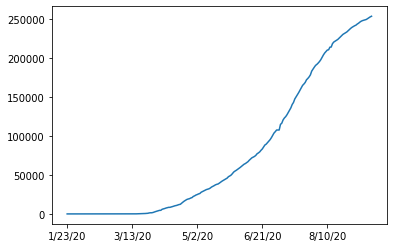

In [40]:
df1.loc[df1['9/8/20']==249241]
LA = df1.iloc[213, 11:]
type(LA)
print(LA)
LA.plot()

## plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7febb69eaa20>,
      dtype=object)

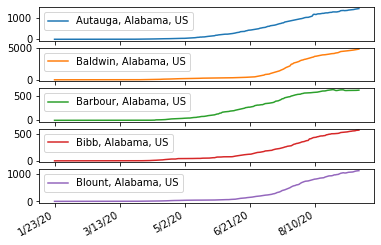

In [41]:
UScases = df1.iloc[0:5, 11:].transpose()
UScases.shape
UScases.plot(subplots=True)

## Add meaningful index to the dataframe

In [46]:
# one way is to load csv with index 
df1 = pd.read_csv(fullpath1, error_bad_lines=False, index_col=10)
df1.reset_index(drop=True)
df1.index

Index(['Autauga, Alabama, US', 'Baldwin, Alabama, US', 'Barbour, Alabama, US',
       'Bibb, Alabama, US', 'Blount, Alabama, US', 'Bullock, Alabama, US',
       'Butler, Alabama, US', 'Calhoun, Alabama, US', 'Chambers, Alabama, US',
       'Cherokee, Alabama, US',
       ...
       'Park, Wyoming, US', 'Platte, Wyoming, US', 'Sheridan, Wyoming, US',
       'Sublette, Wyoming, US', 'Sweetwater, Wyoming, US',
       'Teton, Wyoming, US', 'Uinta, Wyoming, US', 'Unassigned, Wyoming, US',
       'Washakie, Wyoming, US', 'Weston, Wyoming, US'],
      dtype='object', name='Combined_Key', length=3340)

In [62]:
# another way is to re-assign index
df1 = pd.read_csv(fullpath1, error_bad_lines=False)
newrows = list( df1['Combined_Key'])
df1.index =  newrows
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1030,1050,1065,1086,1169,1174,1162,1188,1196,1196,1206,1218,1219,1235,1241,1240,1255,1264,1266,1286,1286,1281,1284,1296,1309,1345,1348,1354,1345,1349,1355,1371,1377,1383,1385,1398,1413,1420,1432,1442
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3322,3380,3443,3502,3544,3651,3670,3710,3744,3791,3839,3877,3888,3906,3931,3957,3997,4037,4069,4083,4100,4166,4199,4230,4307,4402,4422,4445,4458,4495,4513,4542,4569,4586,4609,4639,4678,4722,4752,4781
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,564,565,569,573,575,576,579,581,586,590,598,604,605,606,613,619,622,626,629,633,628,616,614,620,624,628,628,629,617,614,616,616,616,617,617,618,618,618,620,622
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,384,413,416,426,438,442,444,453,457,465,469,469,474,476,490,494,501,503,510,510,511,513,515,517,523,533,535,538,541,542,545,550,555,557,562,564,566,574,576,578
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,745,759,774,788,800,812,816,825,835,848,854,860,863,887,901,912,930,931,934,946,967,968,979,983,1004,1025,1034,1045,1036,1037,1049,1062,1065,1070,1071,1082,1099,1109,1114,1121


In [59]:
list(df1['Combined_Key'] )[1:10]

['Baldwin, Alabama, US',
 'Barbour, Alabama, US',
 'Bibb, Alabama, US',
 'Blount, Alabama, US',
 'Bullock, Alabama, US',
 'Butler, Alabama, US',
 'Calhoun, Alabama, US',
 'Chambers, Alabama, US',
 'Cherokee, Alabama, US']

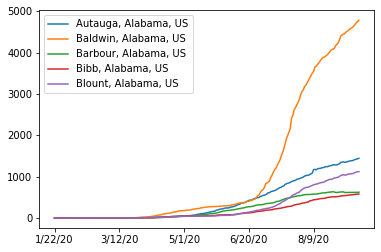

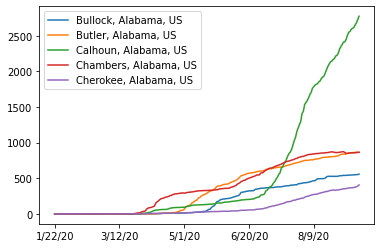

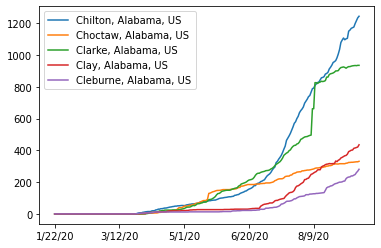

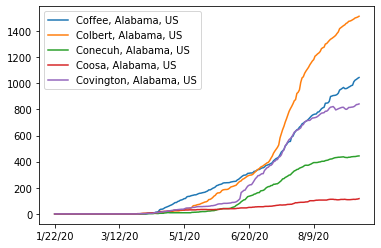

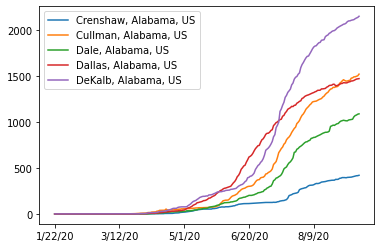

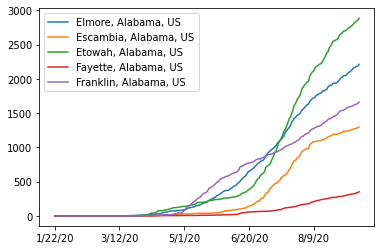

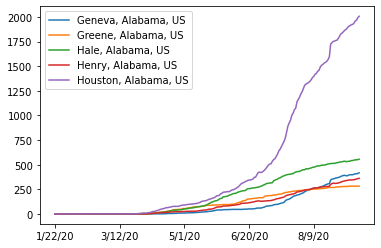

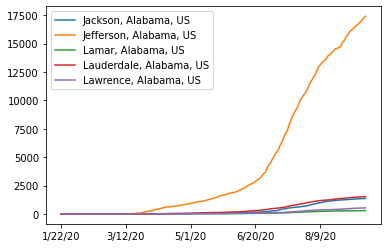

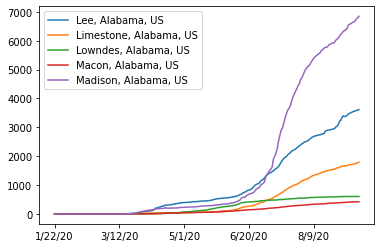

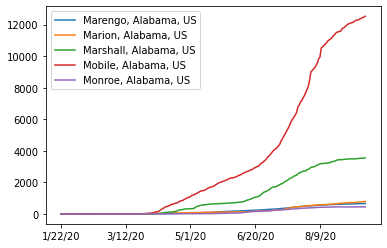

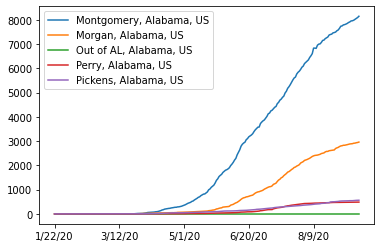

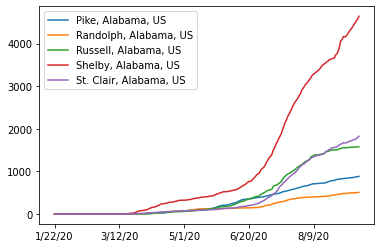

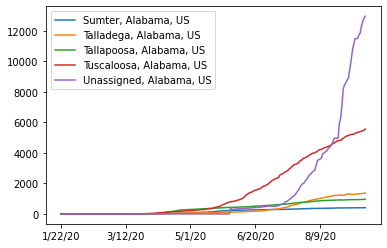

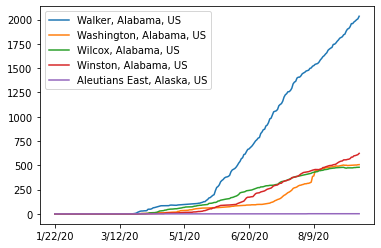

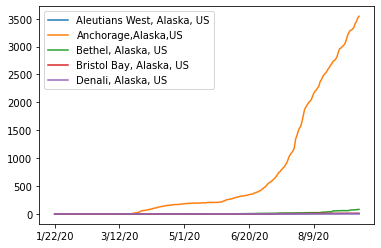

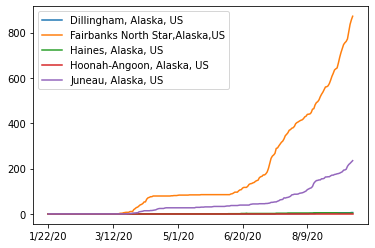

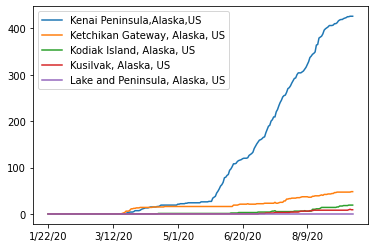

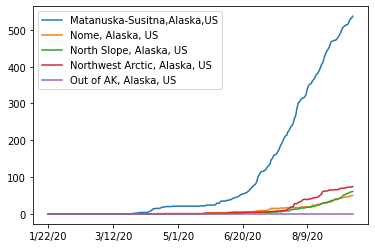

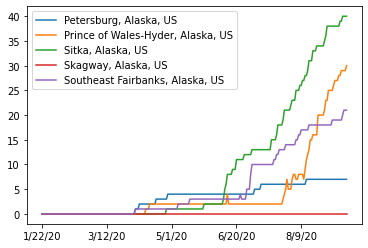

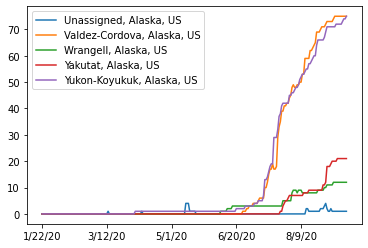

In [63]:
step = 5
for i in range(0, 100, step):
#for i in range(0, 3340, step):
  UScases = df1.iloc[ i : (i+step), 11:].transpose()
  UScases.plot()

Examine the row with the largest value on 9/8/2020

In [ ]:
subset = df1.loc[df1['9/8/20']==249241]

In [ ]:
subset = subset.transpose()
subset = subset.iloc[:][11:]
type(subset)

pandas.core.frame.DataFrame

In [ ]:
type(subset)

pandas.core.frame.DataFrame

In [ ]:
from datetime import datetime

#datetime.strptime( '9/8/20', '%m/%d/%y') 

dates = [datetime.strptime( x, '%m/%d/%y') for x in subset.columns[11:]]
print(dates)

[]


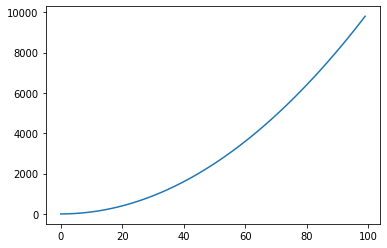

In [ ]:
x = np.array(range(100))
y = x**2
pyplot.plot(x, y)


In [ ]:
df1.loc[ :, ['9/6/20', '9/8/20']]

,9/6/20,9/8/20
0,1377,1385
1,4569,4609
2,616,617
3,555,562
4,1065,1071
...,...,...
3335,447,450
3336,308,309
3337,0,0
3338,111,111


In [ ]:
df1.iloc[5:10, -20:-1 ]

,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
5,527,527,526,527,530,535,536,537,541,540,541,541,544,545,545,545,548,550,551
6,805,804,809,813,814,827,835,837,840,839,841,848,853,857,859,859,862,863,863
7,2168,2179,2215,2225,2255,2316,2346,2377,2411,2413,2447,2503,2547,2558,2593,2602,2615,2652,2679
8,870,863,862,860,863,867,868,873,874,861,850,850,853,855,857,857,858,858,862
9,336,334,331,336,336,341,345,346,353,354,354,362,364,365,367,367,371,376,380


# Explore Global Data set

In [ ]:

df2 = pd.read_csv(fullpath2, error_bad_lines=False)
df2.columns


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/3/20', '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20', '9/9/20',
       '9/10/20', '9/11/20', '9/12/20'],
      dtype='object', length=239)

In [ ]:
df2['Country/Region']
list(df2['Country/Region'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [ ]:
df2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335


In [ ]:
df2.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,30.954887,37.315789,45.255639,63.109023,74.763158,89.842105,103.921053,115.796992,129.304511,139.582707,150.973684,160.781955,168.458647,170.030075,226.996241,251.533835,259.586466,267.796992,275.447368,282.522556,284.402256,286.507519,288.872180,295.492481,296.921053,299.041353,302.248120,305.921053,311.033835,316.240602,...,6.968994e+04,7.070960e+04,7.178158e+04,7.283764e+04,7.381407e+04,7.465711e+04,7.551233e+04,7.647033e+04,7.751193e+04,7.858693e+04,7.973111e+04,8.066476e+04,8.146382e+04,8.224989e+04,8.321308e+04,8.424140e+04,8.524560e+04,8.626335e+04,8.726152e+04,8.803574e+04,8.888667e+04,8.979656e+04,9.087874e+04,9.192836e+04,9.298665e+04,9.397164e+04,9.482221e+04,9.580739e+04,9.680317e+04,9.786244e+04,9.889044e+04,1.000676e+05,1.010584e+05,1.018942e+05,1.027735e+05,1.036494e+05,1.047469e+05,1.058701e+05,1.070726e+05,1.081163e+05
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,303.897894,360.297673,443.366813,689.035590,832.953418,1026.582242,1209.754647,1359.927896,1534.122760,1665.831961,1820.905815,1949.402861,2049.809414,2050.149390,2958.034534,3337.708666,3450.661369,3569.103387,3679.809248,3783.531445,3804.941211,3830.105321,3843.654801,3930.735156,3930.773058,3943.282630,3973.896751,3998.654470,4024.279270,4044.748524,...,3.663504e+05,3.717965e+05,3.776100e+05,3.832570e+05,3.888223e+05,3.931862e+05,3.974734e+05,4.026420e+05,4.084647e+05,4.142181e+05,4.203601e+05,4.253771e+05,4.294794e+05,4.331231e+05,4.382516e+05,4.436425e+05,4.488150e+05,4.538117e+05,4.591654e+05,4.630888e+05,4.670401e+05,4.717421e+05,4.774628e+05,4.829940e+05,4.885157e+05,4.940581e+05,4.983687e+05,5.033069e+05,5.087607e+05,5.143561e+05,5.197116e+05,5.260300e+05,5.316019e+05,5.361459e+05,5.399441e+05,5.442783e+05,5.497977e+05,5.556045e+05,5.620620e+05,5.678329e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000

In [ ]:
### Check if the dataframe contains NaN values
df2.isna().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
1/22/20           False
                  ...  
9/8/20            False
9/9/20            False
9/10/20           False
9/11/20           False
9/12/20           False
Length: 239, dtype: bool

In [ ]:
# Countries affected
countries = df2['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  188
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras'